## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [ ]:
taxi_data = pd.read_csv("taxi_train_data.zip")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [ ]:
taxi_data.pickup_datetime.min(),taxi_data.pickup_datetime.max()

('2016-01-01 00:00:17', '2016-06-30 23:59:39')

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [ ]:
taxi_data.isnull().sum()
#plt.figure(figsize=(10,6))
#sns.heatmap(new_df.isna().transpose());

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


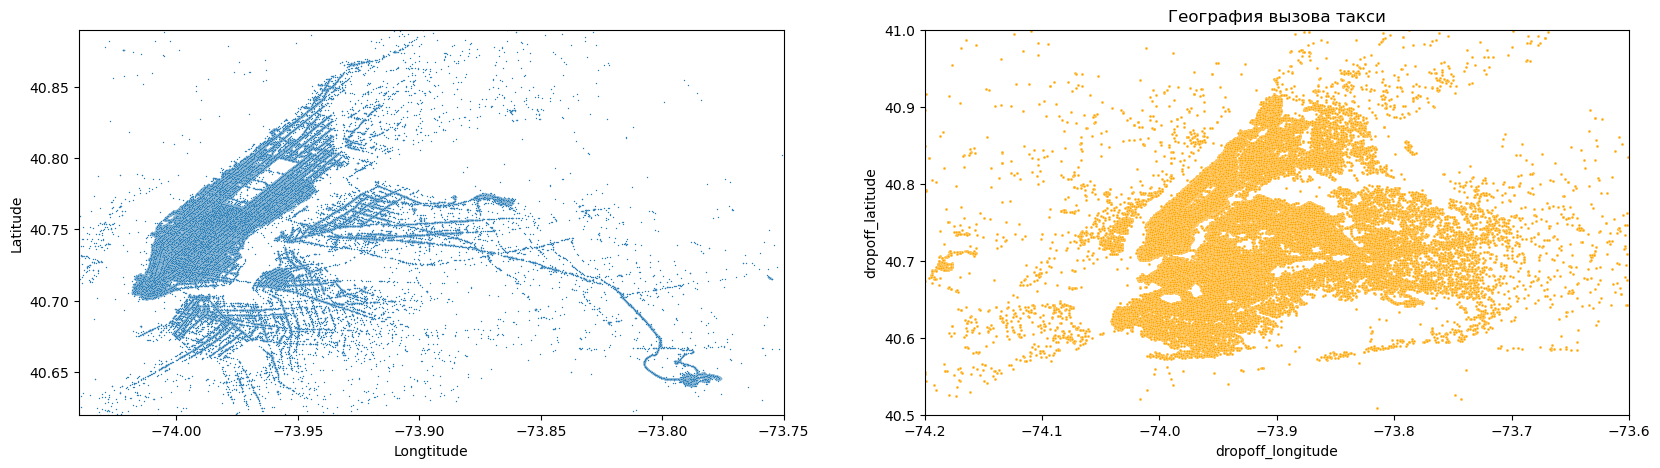

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=taxi_data, s=1,ax=ax[0],)
ax[0].set_xlim([-74.04, -73.75])
ax[0].set_ylim([40.62, 40.89])
ax[0].set_xlabel('Longtitude')
ax[0].set_ylabel('Latitude')


sns.scatterplot(x=taxi_data['dropoff_longitude'],
                y=taxi_data['dropoff_latitude'], s=4, ax=ax[1], color='orange')
ax[1].set_xlim([-74.2, -73.6])
ax[1].set_ylim([40.5, 41.0])
plt.title('География вызова такси')
plt.show()

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [ ]:
display(taxi_data.passenger_count.max())
display(taxi_data.vendor_id.nunique())

9

2

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [ ]:
taxi_data.trip_duration.median()

662.0

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [ ]:
def add_datetime_features(data,feature) :
  date= pd.to_datetime(data[feature],format = '%Y-%m-%d')
  display(date.head(1))
  display(date.dt.date.head(1))
  display(date.dt.hour.head(1))
  display(date.dt.dayofweek.head(1))

  data["pickup_date"]=date.dt.date
  data["pickup_hour"]=date.dt.hour
  data["pickup_day_of_week"]=date.dt.dayofweek

  #return data
  display(data.head(2))
  


In [ ]:
add_datetime_features(taxi_data,'pickup_datetime')

0   2016-03-14 17:24:55
Name: pickup_datetime, dtype: datetime64[ns]

0    2016-03-14
Name: pickup_datetime, dtype: object

0    17
Name: pickup_datetime, dtype: int64

0    0
Name: pickup_datetime, dtype: int64

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,2016-06-12,0,6


In [ ]:
taxi_data[(taxi_data["pickup_day_of_week"]==5)].shape[0]

220868

In [ ]:
taxi_data["pickup_datetime"]=pd.to_datetime(taxi_data["pickup_datetime"],format = '%Y-%m-%d')
taxi_data["pickup_datetime"].dt.day.value_counts()[:2]

16    51027
14    50488
Name: pickup_datetime, dtype: int64

In [ ]:
taxi_data["pickup_datetime"].dt.day.value_counts().mean()

47053.032258064515

In [ ]:
mean_per_day = taxi_data.shape[0] / taxi_data['pickup_date'].nunique()
print(round(mean_per_day), 'поездок в среднем совершается в день')

8015 поездок в среднем совершается в день


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [ ]:
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
# реализуем функцию
def add_holiday_features(df_taxi, df_holiday):
    df_taxi['pickup_holiday'] = df_taxi['pickup_date'].apply(
        lambda x: 1 if str(x) in df_holiday['date'].values else 0
    )
    return df_taxi

# добавляем данные
taxi_data = add_holiday_features(taxi_data, holiday_data)

In [ ]:
# вычисляем длительность поездки
mask = taxi_data['pickup_holiday'] == 1
print(
    'Медианная длительность поезди в праздничные дни:',
    taxi_data[mask]['trip_duration'].median()
)

Медианная длительность поезди в праздничные дни: 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [ ]:
# загружаем файл с праздничными датами
osrm_data = pd.read_csv("osrm_data_train.csv")

In [ ]:
osrm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [ ]:
osrm_data.isna().sum()

id                      0
starting_street         0
end_street              0
total_distance          0
total_travel_time       0
number_of_steps         0
street_for_each_step    0
distance_per_step       0
travel_time_per_step    0
step_maneuvers          0
step_direction          0
step_location_list      0
dtype: int64

In [ ]:
# реализуем функцию
def add_osrm_features(df_taxi, df_osrm):
    
    df_osrm = df_osrm[
        ['id', 'total_distance', 'total_travel_time', 'number_of_steps']
    ]
    return df_taxi.merge(df_osrm, on = 'id', how = 'left')

# добавляем данные
taxi_data_new = add_osrm_features(taxi_data, osrm_data)

In [ ]:
median_time_delta = (
    taxi_data_new['trip_duration'].median()
    - taxi_data_new['total_travel_time'].median()
)
print('Разница в секундах:', round(median_time_delta,1))

Разница в секундах: 372.5


In [ ]:
cols_null_count = taxi_data_new.isna().sum()
cols_with_null = cols_null_count[cols_null_count > 0]
print('\n', 'Количество пропусков по колонкам:\n', cols_with_null)


 Количество пропусков по колонкам:
 total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64


In [ ]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [ ]:
def add_geographical_features(df):
    lat1, lng1 = df['pickup_latitude'], df['pickup_longitude']
    lat2, lng2 = df['dropoff_latitude'], df['dropoff_longitude']
    df['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    df['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return df


taxi_data = add_geographical_features(taxi_data_new)

print('Median haversine distance: {:.2f} km'.format(
    taxi_data['haversine_distance'].median()))

Median haversine distance: 2.09 km


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [ ]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

def add_cluster_features(df, cluster):
   
    df['geo_cluster'] = cluster.predict(df[[
        'pickup_latitude',
        'pickup_longitude',
        'dropoff_latitude',
        'dropoff_longitude'
    ]])
    return df

# генерируем новый признак
taxi_data = add_cluster_features(taxi_data, kmeans)

# проверяем получившиеся кластеры
taxi_data['geo_cluster'].value_counts().sort_values(ascending = False)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [ ]:
weather_data = pd.read_csv('weather_data.zip')
# реализуем функцию
def add_weather_features(df_taxi, df_weather):
  
    # извлекаем дату и час, оставляем только нужные данные о погоде
    df_weather['time'] = pd.to_datetime(
        df_weather['time'],
        format = '%Y-%m-%d %H:%M:%S'
    )
    df_weather['date'] = df_weather['time'].dt.date
    df_weather['hour'] = df_weather['time'].dt.hour
    df_weather = df_weather[[
        'temperature',
        'visibility',
        'wind speed',
        'precip',
        'events',
        'date',
        'hour'
    ]]
    # объединяем данные
    df_merged = df_taxi.merge(
        df_weather,
        how = 'left',
        left_on = ['pickup_date', 'pickup_hour'],
        right_on = ['date', 'hour']
    )
    df_new = df_merged.drop(['date', 'hour'], axis = 1)
    return df_new


In [ ]:
taxi_data = add_weather_features(taxi_data, weather_data)

mask = taxi_data['events'] == 'Snow'
print(taxi_data[mask].shape[0], 'поездок было совершено в снежную погоду')
print('-' * 100)
cols_null_perc = taxi_data.isnull().mean() * 100
cols_with_null = cols_null_perc[
    cols_null_perc > 0
].sort_values(ascending = False)
print('Пропуски в процентах:\n', round(cols_with_null, 2))

13126 поездок было совершено в снежную погоду
----------------------------------------------------------------------------------------------------
Пропуски в процентах:
 temperature         0.820
visibility          0.820
wind speed          0.820
precip              0.820
events              0.820
total_distance      0.000
total_travel_time   0.000
number_of_steps     0.000
dtype: float64


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [ ]:
def fill_null_weather_data(df):
  
    # заполняем пропуски в столбцах с погодными условиями медианным значением
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in weather_cols:
        df[col] = df[col].fillna(
            df.groupby('pickup_date')[col].transform('median')
        )
    # заполняем пропуски в столбце 'events' строкой 'None'
    df['events'] = df['events'].fillna('None')
    # заполняем пропуски в столбцах с информацией из OSRM медианным значением
    values = {
        'total_distance': df['total_distance'].median(),
        'total_travel_time': df['total_travel_time'].median(),
        'number_of_steps': df['number_of_steps'].median()
    }
    df = df.fillna(values)
    return df

# применяем созданную функцию к таблице с данными о поездках
taxi_data = fill_null_weather_data(taxi_data)

print('Медиана в столбце temperature:', round(taxi_data['temperature'].median(), 1))

Медиана в столбце temperature: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


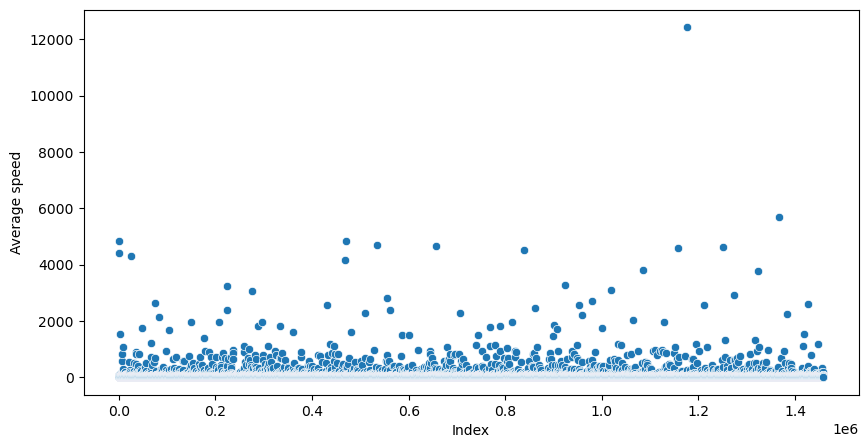

In [ ]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [ ]:
print(
    'Количество выбросов по признаку длительности поездки:',
    taxi_data[taxi_data['trip_duration'] > 86400].shape[0]
)
print(
    'Количество выбросов по признаку скорости:',
    avg_speed[avg_speed > 300].shape[0]
)

mask_1 = taxi_data['trip_duration'] <= 86400
mask_2 = (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) <= 300
taxi_data = taxi_data[mask_1 & mask_2]

Количество выбросов по признаку длительности поездки: 4
Количество выбросов по признаку скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [ ]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

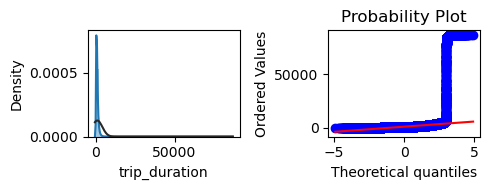

mu: 953.074, sigma: 3171.726


In [ ]:

from scipy.stats import norm, skew
import scipy.stats as stats 
fig, ax = plt.subplots(1, 2, figsize = (5, 2))

sns.distplot(taxi_data['trip_duration'], fit = norm, ax = ax[0])
stats.probplot(taxi_data['trip_duration'], plot = plt)

plt.tight_layout()
plt.show()
mu, sigma = norm.fit(taxi_data['trip_duration'])
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

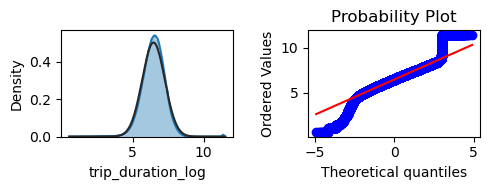

mu: 6.468, sigma: 0.792


In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (5, 2))

sns.distplot(taxi_data['trip_duration_log'], fit = norm, ax = ax[0])
stats.probplot(taxi_data['trip_duration_log'], plot = plt)

plt.tight_layout()
plt.show()
mu, sigma = norm.fit(taxi_data['trip_duration_log'])
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

In [ ]:
# ваш код здесь
_, p = stats.normaltest(taxi_data['trip_duration_log'])
print('p-value = {:.2f}'.format(p))

p-value = 0.00


In [ ]:
alpha = 0.05
h0 = 'Данные распределены нормально'
h1 = 'Распределение отлично от нормального'

if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(h0)
else:
    print(h1)

Распределение отлично от нормального


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

In [ ]:
taxi_data['store_and_fwd_flag'][taxi_data['vendor_id']==1].value_counts()

N    670074
Y      8041
Name: store_and_fwd_flag, dtype: int64

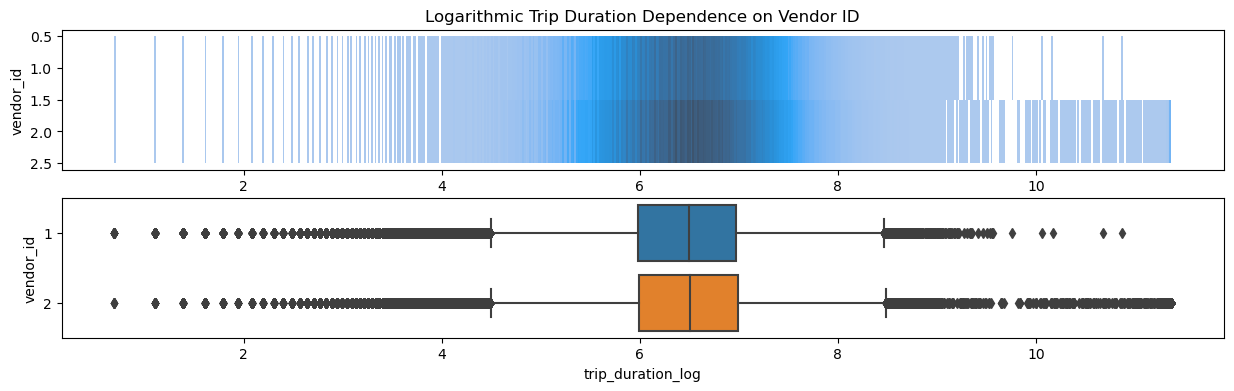

In [ ]:
# ваш код здесь
# преобразуем признак vendor_id в категориальный тип данных
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))
histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Vendor ID')
boxplot = sns.boxplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[1]
);


### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

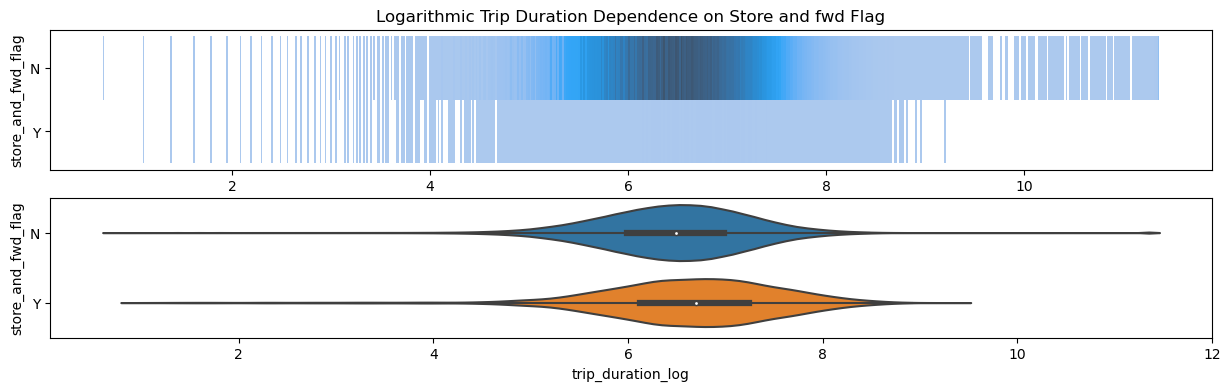

In [ ]:
# ваш код здесь
# на этот раз вместо boxplot построим violinplot
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))

histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Store and fwd Flag')
violinplot = sns.violinplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[1]
);

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

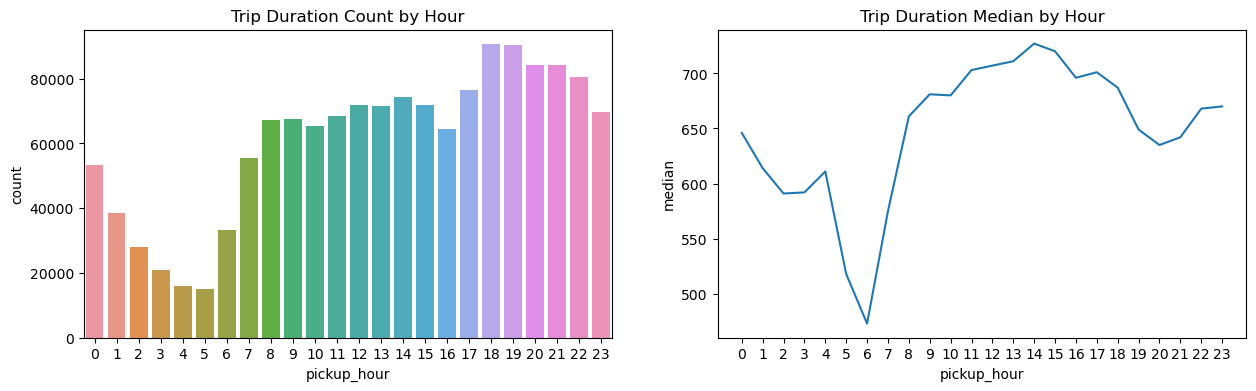

In [ ]:
# ваш код здесь
# группируем данные по часу и рассчитываем медианную длительность поездок
duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()

# строим графики
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = taxi_data, x = 'pickup_hour', ax = axes[0])
countplot.set_title('Trip Duration Count by Hour')
lineplot = sns.lineplot(data = duration_by_hour, ax = axes[1])
lineplot.set_title('Trip Duration Median by Hour')
lineplot.xaxis.set_ticks(duration_by_hour.index)
lineplot.set_ylabel('median');

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


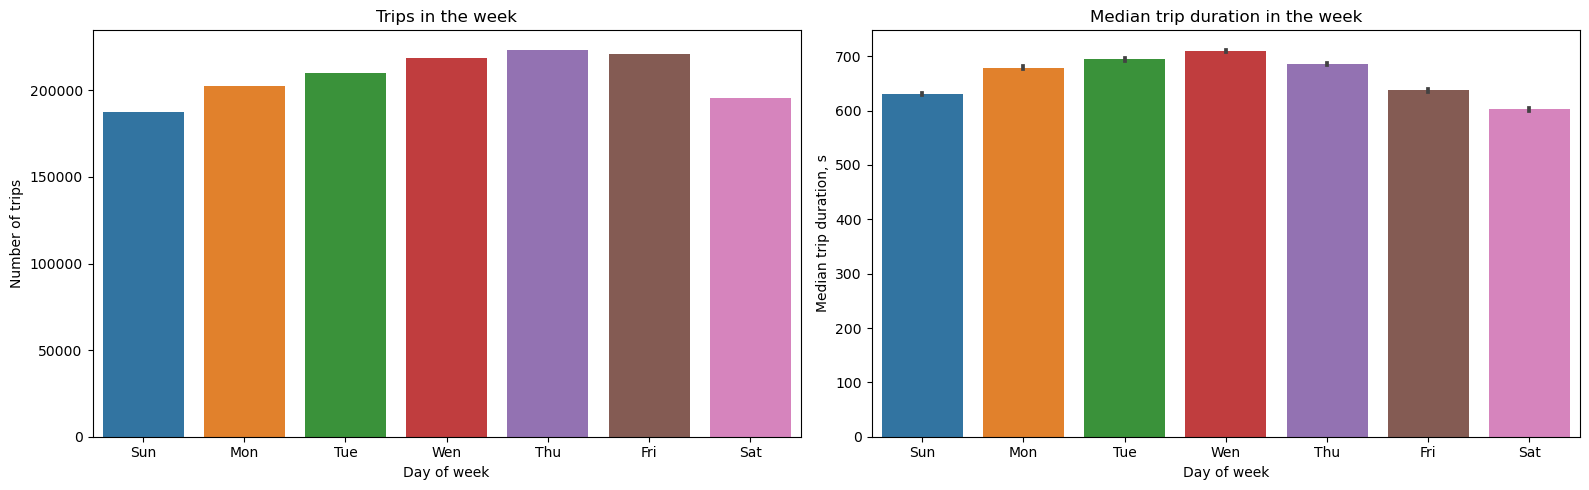

In [ ]:
# ваш код здесь
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.countplot(data=taxi_data, x='pickup_day_of_week', ax=axes[0])
sns.barplot(data=taxi_data, x='pickup_day_of_week', y='trip_duration',
            estimator=np.median, ax=axes[1])

xticks = ['Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat']
axes[0].set_title('Trips in the week')
axes[0].set_xlabel('Day of week')
axes[0].set_ylabel('Number of trips')
axes[0].set_xticks(ticks=range(7), labels=xticks)

axes[1].set_title('Median trip duration in the week')
axes[1].set_xlabel('Day of week')
axes[1].set_ylabel('Median trip duration, s')
axes[1].set_xticks(ticks=range(7), labels=xticks)

plt.tight_layout()

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

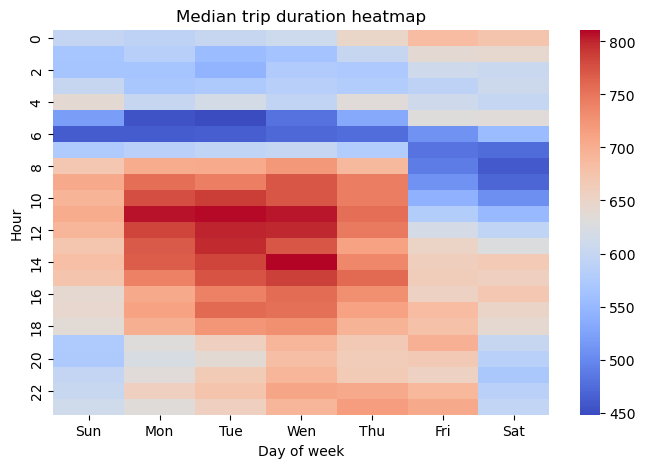

In [ ]:
# ваш код здесь
trip_duration_pivot = pd.pivot_table(
    taxi_data, values='trip_duration', index='pickup_hour', 
    columns='pickup_day_of_week', aggfunc='median')

fig, axes = plt.subplots(figsize=(8, 5))
xticks = ['Sun', 'Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat']
sns.heatmap(trip_duration_pivot, cmap='coolwarm', 
            xticklabels=xticks, yticklabels=2)
axes.set_title('Median trip duration heatmap')
axes.set_xlabel('Day of week')
axes.set_ylabel('Hour');

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


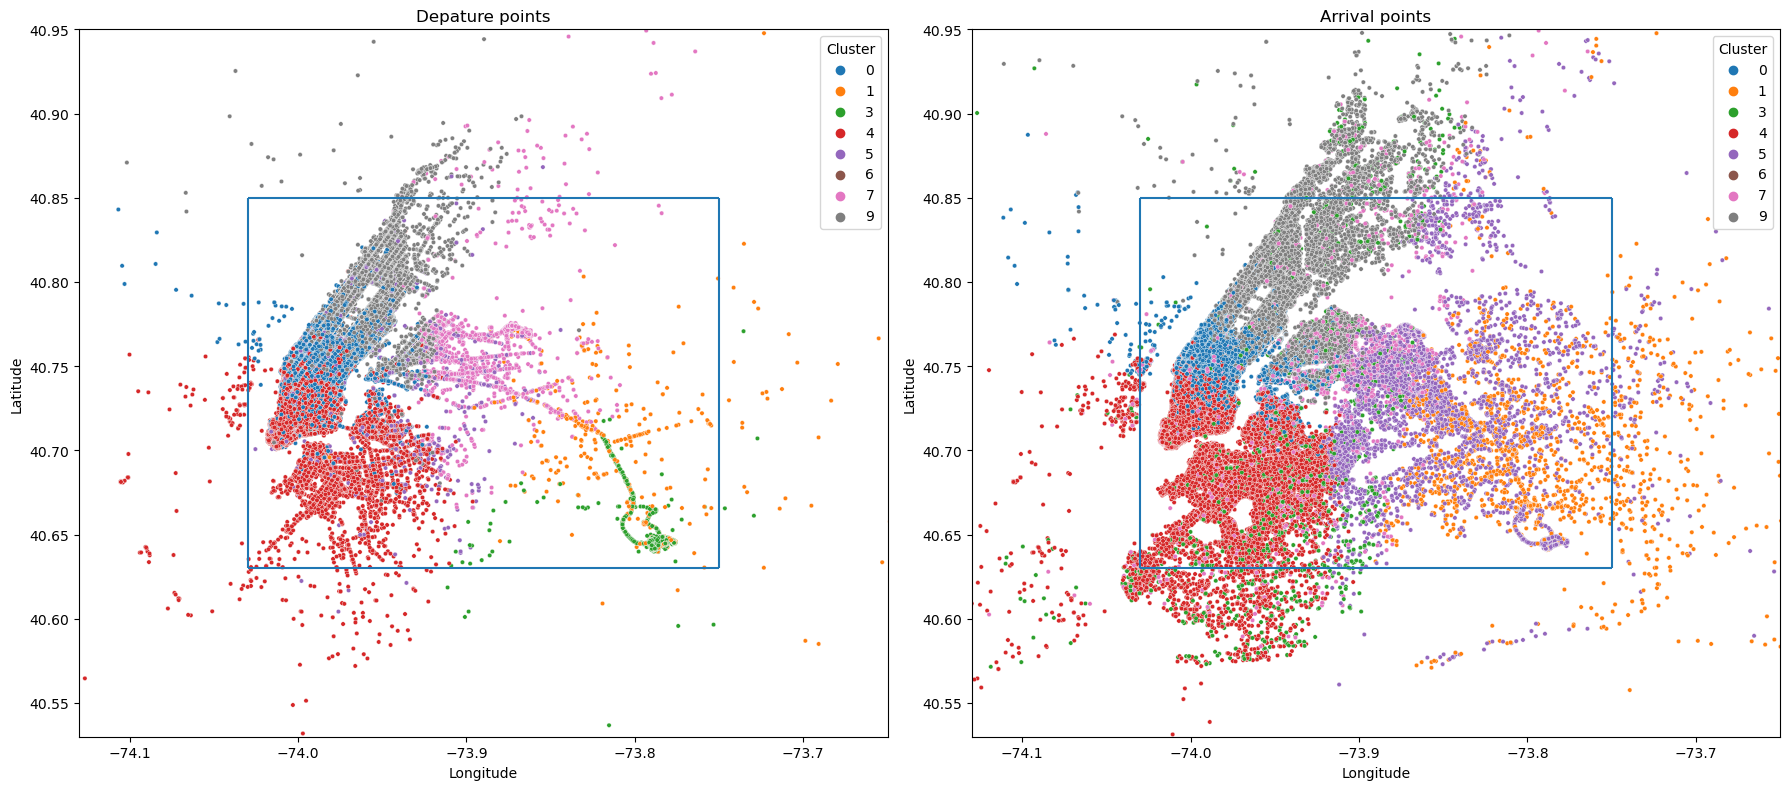

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
sns.scatterplot(data=taxi_data.iloc[0:500000], x='pickup_longitude', y='pickup_latitude', 
                hue='geo_cluster', palette='tab10', s=10, ax=axes[0])
sns.scatterplot(data=taxi_data.iloc[0:500000], x='dropoff_longitude', y='dropoff_latitude', 
                hue='geo_cluster', palette='tab10', s=10, ax=axes[1])

axes[0].legend(loc='upper right', title='Cluster')
axes[0].set_xlim(city_long_border[0]-0.1, city_long_border[1]+0.1)
axes[0].set_ylim(city_lat_border[0]-0.1, city_lat_border[1]+0.1)
axes[0].set_aspect('equal')
axes[0].set_title('Depature points')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].vlines(city_long_border, city_lat_border[0], city_lat_border[1])
axes[0].hlines(city_lat_border, city_long_border[0], city_long_border[1])

axes[1].legend(loc='upper right', title='Cluster')
axes[1].set_xlim(city_long_border[0]-0.1, city_long_border[1]+0.1)
axes[1].set_ylim(city_lat_border[0]-0.1, city_lat_border[1]+0.1)
axes[1].set_aspect('equal')
axes[1].set_title('Arrival points')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].vlines( city_long_border, city_lat_border[0], city_lat_border[1])
axes[1].hlines(city_lat_border, city_long_border[0], city_long_border[1])
plt.tight_layout()


## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [ ]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [ ]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,5.000,1.499,99.970,9,4.400,8.000,27.800,0.300,None,6.122
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,6.000,1.806,-117.154,4,28.900,16.100,7.400,0.000,None,6.498
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,16.000,6.385,-159.680,4,-6.700,16.100,24.100,0.000,None,7.662
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,4.000,1.485,-172.738,4,7.200,16.100,25.900,0.000,None,6.064
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,5.000,1.189,179.474,9,9.400,16.100,9.300,0.000,None,6.078


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 27 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458233 non-null  object        
 1   vendor_id           1458233 non-null  category      
 2   pickup_datetime     1458233 non-null  datetime64[ns]
 3   dropoff_datetime    1458233 non-null  object        
 4   passenger_count     1458233 non-null  int64         
 5   pickup_longitude    1458233 non-null  float64       
 6   pickup_latitude     1458233 non-null  float64       
 7   dropoff_longitude   1458233 non-null  float64       
 8   dropoff_latitude    1458233 non-null  float64       
 9   store_and_fwd_flag  1458233 non-null  object        
 10  trip_duration       1458233 non-null  int64         
 11  pickup_date         1458233 non-null  object        
 12  pickup_hour         1458233 non-null  int64         
 13  pickup_day_o

### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [ ]:
# ваш код здесь
train_data.drop(columns=['id', 'dropoff_datetime'], inplace=True)
print('Number of columns: {}'.format(train_data.shape[1]))

Number of columns: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [ ]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [ ]:
# ваш код здесь
# кодируем признак vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(
    lambda x: 0 if x == 1 else 1
).astype('int')

print(
    'Среднее по столбцу vendor_id:',
    round(train_data['vendor_id'].mean(), 2)
)

Среднее по столбцу vendor_id: 0.53


In [ ]:
# кодируем признак store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(
    lambda x: 0 if x == 'N' else 1
)

print(
    'Среднее по столбцу store_and_fwd_flag:',
    round(train_data['store_and_fwd_flag'].mean(), 3)
)

Среднее по столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
# ваш код здесь
encoder = preprocessing.OneHotEncoder(drop='first', sparse=False)
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']
encoder.fit(train_data[columns_to_change])
data_onehot = pd.DataFrame(
    encoder.transform(train_data[columns_to_change]),
    columns=encoder.get_feature_names_out(columns_to_change))

print('Number of encoded columns: {}'.format(data_onehot.shape[1]))
data_onehot.head(2)

Number of encoded columns: 18


,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
1,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000


Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
train_data_ = train_data.drop(['trip_duration'], axis=1)

In [ ]:
corr_df=pd.DataFrame(train_data_.corr()["trip_duration_log"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

,trip_duration_log
trip_duration_log,1.000000
total_travel_time,0.702486
total_distance,0.633126
number_of_steps,0.619963
haversine_distance,0.607916
geo_cluster_3,0.239355
geo_cluster_5,0.222483
geo_cluster_7,0.165658
pickup_longitude,0.112479
dropoff_longitude,0.073479


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
# ваш код здесь
# отбираем признаки
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_regression,
    k = 25
)
selector.fit(X_train, y_train_log)

# оставляем только полученные 25 признаков
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]
print('Признаки, которые вошли в список отобранных:\n', best_features)

Признаки, которые вошли в список отобранных:
 ['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем данные
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

print(
    'Среднее арифметическое для первого предиктора из валидационной выборки:',
    np.round(np.mean(X_valid[:, 0]), 3)
)

# составляем DataFrame из массивов
X_train = pd.DataFrame(X_train, columns = best_features)
X_valid = pd.DataFrame(X_valid, columns = best_features)

Среднее арифметическое для первого предиктора из валидационной выборки: 0.535


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь
def plot_predict(y_test,predicted):
  A = np.array(y_test).reshape(-1, 1)
  B = predicted.reshape(-1, 1)

  print(type(predicted))
  print(type(y_test))
  plt.rcParams['figure.figsize'] = 16,5
  plt.figure()
  plt.plot(A[-100:], label="Real")
  plt.plot(B[-100:], label="Predicted")
  plt.legend()
  plt.title("score: real vs predicted")
  plt.ylabel("score")
  plt.xticks(())
  rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))

  print('RMSE: ',rmse)

  print('Variance score: %.2f' % metrics.r2_score(y_test, predicted))
  plt.show()

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить


class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = LinearRegression()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 
        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

 

pipeline = Pipeline(steps=[
    ('model',  ClfSwitcher())
])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters_reg = [
    {
        'model': (Ridge(),),
        'model__alpha': np.logspace(-1, 2, 10),
        'model__fit_intercept':[True,False]
    },
    {
        'model': ( Lasso(),),
        'model__alpha': np.logspace(-1, 2, 10),
        'model__fit_intercept':[True,False]
    }
]

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline, param_distributions=parameters_reg,
                              n_iter = 100, scoring='neg_mean_squared_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train_log);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
rf_random.best_estimator_

Pipeline(steps=[('model', Ridge(alpha=2.1544346900318834))])

In [ ]:
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_validate
best_=rf_random.best_estimator_
best_.fit(X_train, y_train_log)
# предсказываем на тестовых данных
y_predict=best_.predict(X_valid)

scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

# используем функцию кросс-валидации           

scores = cross_validate(best_, # какую модель тестируем
                        X_train, y_train_log, # на каких данных
                      scoring=scoring,  #на каких метриках
                      # как разбиваем данные при кросс-валидации
                      cv=ShuffleSplit(n_splits=3, random_state=42),return_train_score=True)


print('Результаты Кросс-валидации')
DF_cv_forest = pd.DataFrame(scores)
display(DF_cv_forest)


print('Ошибка на тестовых данных')
print('MSE: %.4f' % metrics.mean_squared_error(y_valid_log,y_predict))
print('RMSE: %.4f' % metrics.mean_squared_error(y_valid_log,y_predict,squared=False))

print('R2 : %.4f' %  metrics.r2_score(y_valid_log,y_predict))
     

Результаты Кросс-валидации


,fit_time,score_time,test_R2,train_R2,test_-MSE,train_-MSE,test_-MAE,train_-MAE,test_Max,train_Max
0,1.468,0.034,0.538,0.543,-0.290,-0.287,-0.380,-0.378,-12.310,-9.274
1,1.649,0.025,0.543,0.542,-0.285,-0.287,-0.378,-0.379,-5.643,-11.069
2,1.265,0.021,0.541,0.542,-0.292,-0.287,-0.381,-0.378,-9.348,-12.146


Ошибка на тестовых данных
MSE: 0.2898
RMSE: 0.5383
R2 : 0.5401


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
RMSE:  0.5382889567942633
Variance score: 0.54


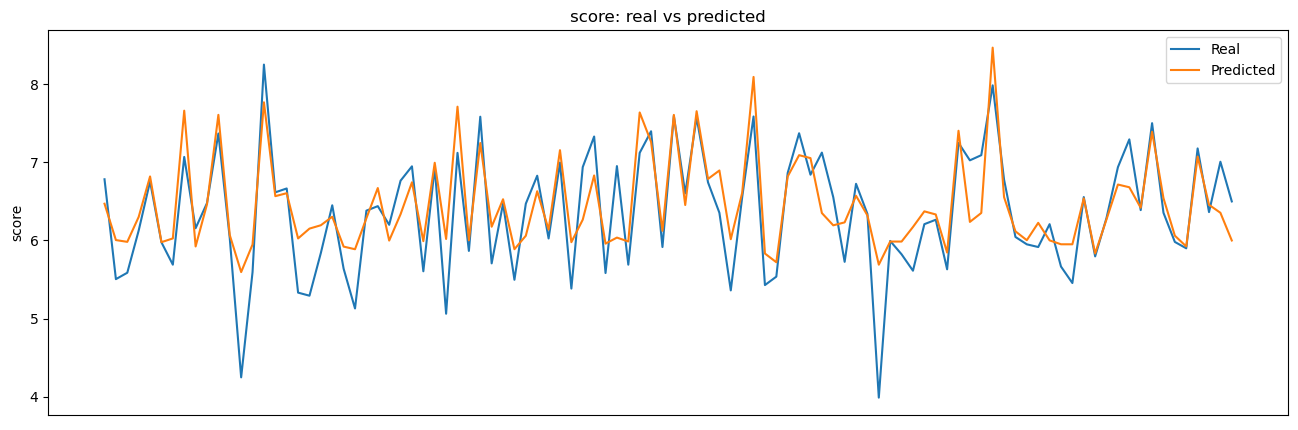

In [ ]:
plot_predict(y_valid_log,y_predict)


In [ ]:
my_train=taxi_data.copy()

In [ ]:
my_train.drop(columns=['id', 'dropoff_datetime'], inplace=True)
my_train = my_train.drop(drop_columns, axis=1)

In [ ]:
my_train = my_train.drop(['trip_duration'], axis=1)

In [ ]:
num_cols =my_train.select_dtypes(include=np.number).columns
cat_cols = my_train.columns[my_train.dtypes == 'object']

print(f"We have {len(num_cols)} numeric columns: {', '.join(num_cols)}")
print(f"And {len(cat_cols)} categorical columns: {', '.join(cat_cols)}")

We have 19 numeric columns: passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, pickup_hour, pickup_day_of_week, pickup_holiday, total_distance, total_travel_time, number_of_steps, haversine_distance, direction, geo_cluster, temperature, visibility, wind speed, precip, trip_duration_log
And 2 categorical columns: store_and_fwd_flag, events


In [ ]:
my_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458233 entries, 0 to 1458643
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   vendor_id           1458233 non-null  category
 1   passenger_count     1458233 non-null  int64   
 2   pickup_longitude    1458233 non-null  float64 
 3   pickup_latitude     1458233 non-null  float64 
 4   dropoff_longitude   1458233 non-null  float64 
 5   dropoff_latitude    1458233 non-null  float64 
 6   store_and_fwd_flag  1458233 non-null  object  
 7   pickup_hour         1458233 non-null  int64   
 8   pickup_day_of_week  1458233 non-null  int64   
 9   pickup_holiday      1458233 non-null  int64   
 10  total_distance      1458233 non-null  float64 
 11  total_travel_time   1458233 non-null  float64 
 12  number_of_steps     1458233 non-null  float64 
 13  haversine_distance  1458233 non-null  float64 
 14  direction           1458233 non-null  float64 
 15

In [ ]:
new_df=my_train[num_cols]
#new_df["target"]=df["SalesPrice"]
corr_df=pd.DataFrame(new_df.corr()["trip_duration_log"].sort_values(ascending=False)[:15])
corr_df.style.background_gradient(cmap='Blues')

,trip_duration_log
trip_duration_log,1.000000
total_travel_time,0.702486
total_distance,0.633126
number_of_steps,0.619963
haversine_distance,0.607916
pickup_longitude,0.112479
dropoff_longitude,0.073479
temperature,0.058012
pickup_hour,0.039192
passenger_count,0.020809


In [ ]:
high_corr=corr_df["trip_duration_log"]>0.5
display(high_corr[high_corr==True].index)
display(high_corr[high_corr==True].index.shape)

Index(['trip_duration_log', 'total_travel_time', 'total_distance',
       'number_of_steps', 'haversine_distance'],
      dtype='object')

(5,)

In [ ]:
new_num_cols=list(high_corr[high_corr==True].index)
new_num_cols.remove("trip_duration_log")
     

In [ ]:
joined_list = [*new_num_cols, *cat_cols]  # unpack both iterables in a list literal
print(joined_list)

['total_travel_time', 'total_distance', 'number_of_steps', 'haversine_distance', 'store_and_fwd_flag', 'events']


In [ ]:

X = my_train[joined_list]
y = my_train["trip_duration_log"]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:


print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (977016, 6)
Training Labels Shape: (977016,)
Testing Features Shape: (481217, 6)
Testing Labels Shape: (481217,)


In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
numerical_transformer = Pipeline([('poly', PolynomialFeatures(degree=1)),
                                  ('power', PowerTransformer()),
                                  ('scaler', preprocessing.StandardScaler()),])

ct = ColumnTransformer([('num_transformer', numerical_transformer, new_num_cols),
                          ('encoder',preprocessing.OneHotEncoder(handle_unknown = 'ignore'), cat_cols)
                         ])
pipeline=Pipeline([('column_transformer', ct)])
     

In [ ]:

X_train = pipeline.fit_transform(X_train) # потом преобразуем  transform 
X_test  = pipeline.transform(X_test) # для тестовых - просто transform 


In [ ]:

def regression_report(y_test,y_predict):
    print('Ошибка на тестовых данных')
    print('MAE: %.4f' % metrics.mean_absolute_error(y_test,y_predict))
    print('RMSE: %.4f' % metrics.mean_squared_error(y_test,y_predict,squared=False))

    print('R2 : %.4f' %  metrics.r2_score(y_test,y_predict))


In [ ]:

pipeline_ = Pipeline(steps=[
    ('model',  ClfSwitcher())
])

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline_, param_distributions=parameters_reg,
                              n_iter = 100, scoring='neg_mean_squared_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
rf_random.best_estimator_

Pipeline(steps=[('model', Ridge(alpha=46.41588833612777))])

In [ ]:
predict=rf_random.best_estimator_.predict(X_test) 
regression_report(y_test,predict)

Ошибка на тестовых данных
MAE: 0.3448
RMSE: 0.4906
R2 : 0.6180


# RANDOM_FOREST

In [ ]:
# Number of trees in random forest
n_estimators =[int(x) for x in np.linspace(20, 50, num = 7)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 18, num =7)]
#max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(50, 100, num = 7)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
parameters_forest = [
  {
        'model': (RandomForestRegressor(),),
        'model__n_estimators': n_estimators,
        'model__max_features': max_features,
        'model__max_depth': max_depth,
        'model__min_samples_leaf': min_samples_leaf,
        #'model__bootstrap': bootstrap,
    }
]

In [ ]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline_, param_distributions=parameters_forest,
                              n_iter = 100, scoring='neg_mean_squared_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
predict=rf_random.best_estimator_.predict(X_test) 
regression_report(y_test,predict)

Ошибка на тестовых данных
MAE: 0.3278
RMSE: 0.4694
R2 : 0.6503


# degree_2_reg


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:

numerical_transformer = Pipeline([('poly', PolynomialFeatures(degree=2)),
                                  ('power', PowerTransformer()),
                                  ('scaler', preprocessing.StandardScaler()),])

ct = ColumnTransformer([('num_transformer', numerical_transformer, new_num_cols),
                          ('encoder',preprocessing.OneHotEncoder(handle_unknown = 'ignore'), cat_cols)
                         ])
pipeline=Pipeline([('column_transformer', ct)])


In [ ]:

X_train = pipeline.fit_transform(X_train) # потом преобразуем  transform 
X_test  = pipeline.transform(X_test) # для тестовых - просто transform 


In [ ]:
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=pipeline_, param_distributions=parameters_reg,
                              n_iter = 100, scoring='neg_mean_squared_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
predict=rf_random.best_estimator_.predict(X_test) 
regression_report(y_test,predict)

Ошибка на тестовых данных
MAE: 0.3368
RMSE: 0.4799
R2 : 0.6344


k means является хорошим подходом для поиска линейности но обязательно выбрать правильное число К чтобы достигать целей. на платформе есть своиства для случайная леса но в таком случае очень дольго обучается модель при этом  переобучается(очевидно) . обычно при увеличении дерево случайный лесь не переобучается и не надо бы выбрать 200 дерево.дальнейшем можно использовать boosting и также сделать поиск аномалий